# CS 1656 – Introduction to Data Science (Spring 2020) 

## Instructor: Alexandros Labrinidis and Evangelos Karageorgos /Teaching Assistant: Xiaoting Li

## Term Project 

**Released: March 23, 2020**

**Due: April 21, 2020**

In [1]:
# Your name: Sean Mizerski
# Your github ID: stm107
# Your pitt username: stm107@pitt.edu

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `pgh_bike.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster
import numpy

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [3]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

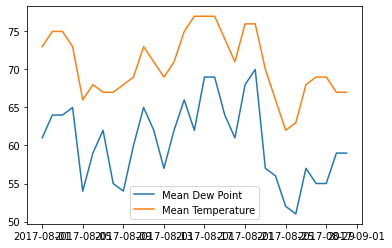

In [4]:
import datetime
from pandas.plotting import register_matplotlib_converters
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
register_matplotlib_converters()

df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [5]:
df_q1 = pd.read_csv('HealthyRideRentals2019-Q1.csv', sep=',', engine='python', parse_dates=[1,2])
df_q2 = pd.read_csv('HealthyRideRentals2019-Q2.csv', sep=',', engine='python', parse_dates=[1,2])
df_q3 = pd.read_csv('HealthyRideRentals2019-Q3.csv', sep=',', engine='python', parse_dates=[1,2])
df_q12 = pd.merge(df_q1, df_q2, how='outer')
df_all = pd.merge(df_q12, df_q3, how='outer')
df_all["From station id"] = df_all["From station id"].fillna(0).astype(int)
df_all["To station id"] = df_all["To station id"].fillna(0).astype(int)
#df_all = df_q1

print("========DAILY CACULATIONS========")

# Dataframe for fromCNT PER DAY
print("========FROM COUNT PER STATION PER DAY========")
df_fct = df_all[['Starttime', 'From station id']].copy()
df_fct['Starttime'] = df_fct['Starttime'].dt.date
df_fct = df_fct.groupby(['Starttime', 'From station id']).size().to_frame('fromCNT').reset_index()
print(df_fct.head(20))

# Dataframe for toCNT PER DAY
print("========TO COUNT PER STATION PER DAY========")
df_tct = df_all[['Stoptime', 'To station id']].copy()
df_tct['Stoptime'] = df_tct['Stoptime'].dt.date
df_tct = df_tct.groupby(['Stoptime', 'To station id']).size().to_frame('toCNT').reset_index()
print(df_tct.head(20))


# Datafrom for rebalCNT PER DAY
print("========REBALANCE COUNT PER STATION PER DAY========")
#First, we make a dataframe to iterate through to count the rebals
df_rebal = df_all[['Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
df_rebal.sort_values(by=['Bikeid', 'Starttime'], inplace=True)
rebal_tups = []

for i in range(1, len(df_rebal)):
    if (df_rebal.loc[i-1,'To station id'] != df_rebal.loc[i, 'From station id']) and (df_rebal.loc[i-1,'To station id'] != 0) and (df_rebal.loc[i, 'From station id'] != 0):
        new_tup = (df_rebal.loc[i-1,'Starttime'], df_rebal.loc[i-1,'To station id'], 1)
        rebal_tups.append(new_tup)
    else:
        new_tup = (df_rebal.loc[i-1,'Starttime'], df_rebal.loc[i-1,'To station id'], 0)
        rebal_tups.append(new_tup)

# Next, we create a new datafrom to merge the above rebal counts into
df_rct = df_all[['Starttime', 'To station id']].copy()
df_counts = pd.DataFrame(rebal_tups, columns=['Starttime', 'To station id', 'rebalCNT'])
df_merge = pd.merge(df_rct, df_counts, how='left', on=['To station id', 'Starttime'])
df_merge['Starttime'] = df_merge['Starttime'].dt.date
df_merge = df_merge.groupby(['Starttime','To station id']).size().to_frame('rebalCNT').reset_index()
print(df_merge.head(20))


========DAILY CACULATIONS========
========FROM COUNT PER STATION PER DAY========
     Starttime  From station id  fromCNT
0   2019-01-01             1000        4
1   2019-01-01             1002        1
2   2019-01-01             1009        1
3   2019-01-01             1010        1
4   2019-01-01             1012        4
5   2019-01-01             1021        2
6   2019-01-01             1023        1
7   2019-01-01             1024        2
8   2019-01-01             1028        1
9   2019-01-01             1029        2
10  2019-01-01             1031        2
11  2019-01-01             1033        4
12  2019-01-01             1045        2
13  2019-01-01             1048        1
14  2019-01-01             1049        3
15  2019-01-01             1061        1
16  2019-01-01             1069        1
17  2019-01-01             1094        1
18  2019-01-01             1099        2
19  2019-01-01            49441        1
========TO COUNT PER STATION PER DAY========
      Stoptim

### Task 1.2

In [6]:
print("========MONTHLY CALCULATION========")

# Dataframe for fromCNT PER MONTH
print("========FROM COUNT PER STATION PER MONTH========")
df_fct2 = df_all[['Starttime', 'From station id']].copy()
df_fct2['Starttime'] = df_fct2['Starttime'].dt.month
df_fct2 = df_fct2.groupby(['Starttime', 'From station id']).size().to_frame('fromCNT').reset_index()
print(df_fct2.head(20))

# Dataframe for toCNT PER MONTH
print("========TO COUNT PER STATION PER MONTH========")
df_tct2 = df_all[['Stoptime', 'To station id']].copy()
df_tct2['Stoptime'] = df_tct2['Stoptime'].dt.month
df_tct2 = df_tct2.groupby(['Stoptime', 'To station id']).size().to_frame('toCNT').reset_index()
print(df_tct2.head(20))


# Datafrom for rebalCNT PER MONTH
print("========REBALANCE COUNT PER STATION PER MONTH========")
#First, we make a dataframe to iterate through to count the rebals
df_rebal2 = df_all[['Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
df_rebal2.sort_values(by=['Bikeid', 'Starttime'], inplace=True)
rebal_tups = []

for i in range(1, len(df_rebal)):
    if (df_rebal2.loc[i-1,'To station id'] != df_rebal2.loc[i, 'From station id']) and (df_rebal2.loc[i-1,'To station id'] != 0) and (df_rebal2.loc[i, 'From station id'] != 0):
        new_tup = (df_rebal2.loc[i-1,'Starttime'], df_rebal2.loc[i-1,'To station id'], 1)
        rebal_tups.append(new_tup)
    else:
        new_tup = (df_rebal2.loc[i-1,'Starttime'], df_rebal2.loc[i-1,'To station id'], 0)
        rebal_tups.append(new_tup)

# Next, we create a new datafrom to merge the above rebal counts into
df_rct2 = df_all[['Starttime', 'To station id']].copy()
df_counts2 = pd.DataFrame(rebal_tups, columns=['Starttime', 'To station id', 'rebalCNT'])
df_merge2 = pd.merge(df_rct2, df_counts2, how='left', on=['To station id', 'Starttime'])
df_merge2['Starttime'] = df_merge2['Starttime'].dt.month
df_merge2 = df_merge2.groupby(['Starttime','To station id']).size().to_frame('rebalCNT').reset_index()
print(df_merge2.head(20))

========MONTHLY CALCULATION========
========FROM COUNT PER STATION PER MONTH========
    Starttime  From station id  fromCNT
0           1             1000       35
1           1             1001       59
2           1             1002       36
3           1             1003       11
4           1             1004       32
5           1             1005       17
6           1             1006       39
7           1             1007        6
8           1             1008        5
9           1             1009       42
10          1             1010       44
11          1             1011       25
12          1             1012       16
13          1             1013       35
14          1             1014        2
15          1             1015       41
16          1             1016       50
17          1             1017       28
18          1             1018        4
19          1             1019       24
========TO COUNT PER STATION PER MONTH========
    Stoptime  To station id 

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [7]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

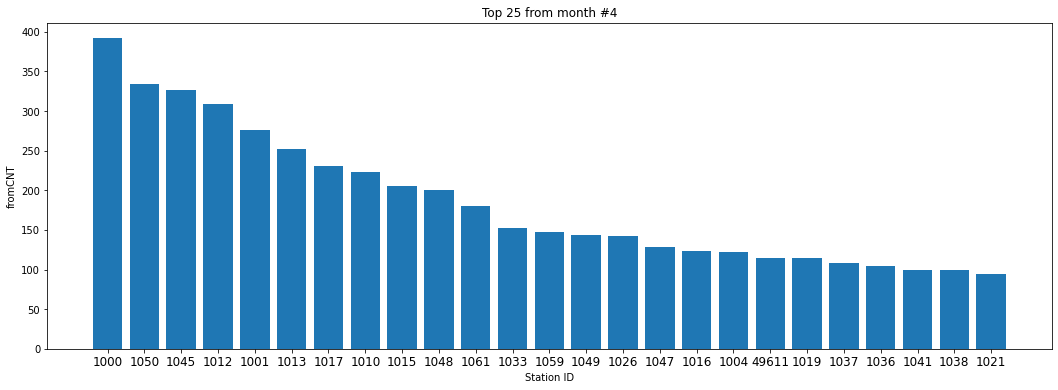

In [8]:
# sort dataframe by fromCNT
df_g1 = df_fct2.copy()
df_g1.sort_values(by=['fromCNT'], inplace=True, ascending=False)
# removing dockless bikes
df_g1.drop(df_g1[df_g1['From station id'] == 0].index , inplace=True)
# filter by filter month
by_month =  df_g1.loc[df_g1['Starttime'] == filter_month]
by_month = by_month.head(25)

by_month['From station id'] = by_month['From station id'].astype(str)
fig = plt.figure(figsize=(18, 6))

plt.bar(by_month['From station id'], by_month['fromCNT'])
plt.xticks(fontsize=12)
plt.xlabel("Station ID")
plt.ylabel("fromCNT")
plt.title("Top 25 from month #" + str(filter_month))

plt.show()

### Task 2.2

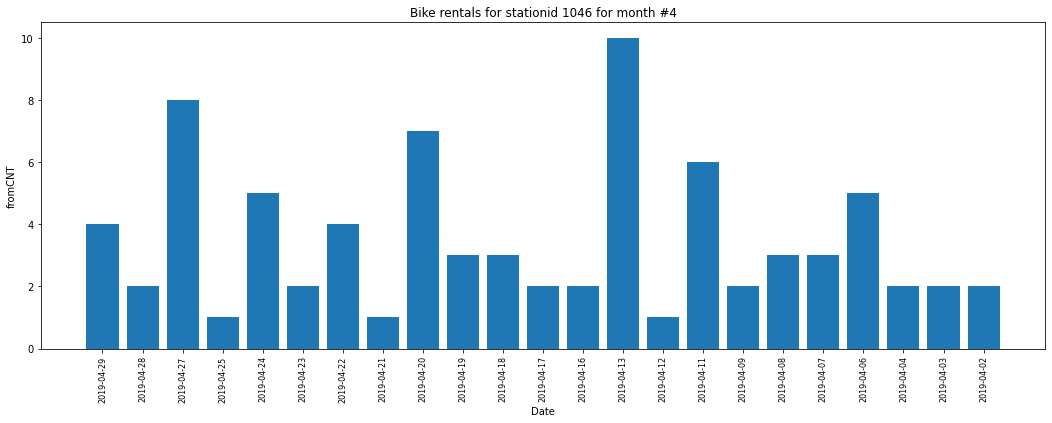

In [9]:
# sort dataframe by fromCNT
df_g2 = df_fct.copy()
# removing dockless bikes
df_g2.drop(df_g2[df_g2['From station id'] == 0].index , inplace=True)
# filter by filter month
df_g2['month'] = pd.DatetimeIndex(df_g2['Starttime']).month
by_month = df_g2.loc[df_g2['month'] == filter_month]

# filter by station id
by_id = by_month.copy()
by_id = by_id.loc[by_id['From station id'] == filter_stationID]

#sort by day
by_id.sort_values(by=['Starttime'], inplace=True, ascending=False)

by_id['Starttime'] = by_id['Starttime'].astype(str)
fig = plt.figure(figsize=(18, 6))

plt.bar(by_id['Starttime'], by_id['fromCNT'])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Date")
plt.ylabel("fromCNT")
plt.title("Bike rentals for stationid " + str(filter_stationID) + " for month #" + str(filter_month))
plt.show()

### Task 2.3

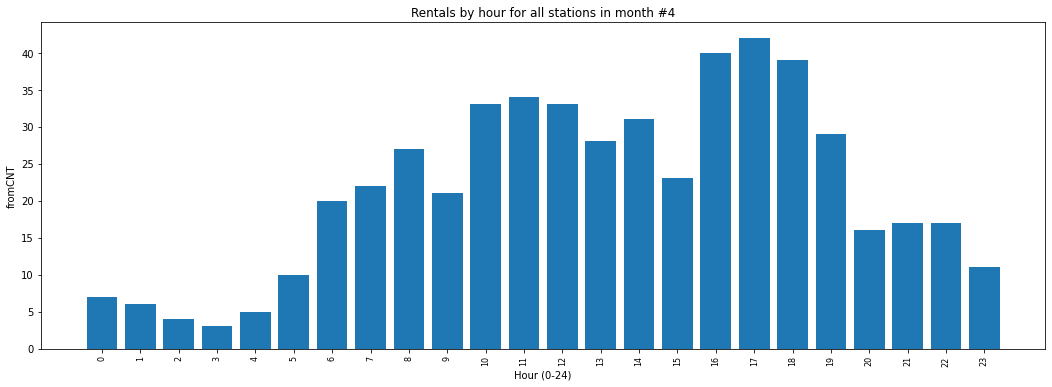

In [10]:
df_fct3 = df_all[['Starttime', 'From station id']].copy()
df_fct3 = df_fct3.groupby(['Starttime', 'From station id']).size().to_frame('fromCNT').reset_index()
df_g3 = df_fct3.copy()

# removing dockless bikes
df_g3.drop(df_g3[df_g3['From station id'] == 0].index , inplace=True)

# Filter by month
# add columns for month and hour
df_g3['month'] = pd.DatetimeIndex(df_g3['Starttime']).month
df_g3['hour'] = pd.DatetimeIndex(df_g3['Starttime']).hour
by_month = df_g3.loc[df_g3['month'] == filter_month]

# Count by hour
by_hour = by_month.copy()

by_hour = by_hour.groupby(['hour', 'From station id']).size().to_frame('fromCNT').reset_index()

fig = plt.figure(figsize=(18, 6))

plt.bar(by_hour['hour'].astype(str), by_hour['fromCNT'])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Hour (0-24)")
plt.ylabel("fromCNT")
plt.title("Rentals by hour for all stations in month #" + str(filter_month))

plt.show()



### Task 2.4

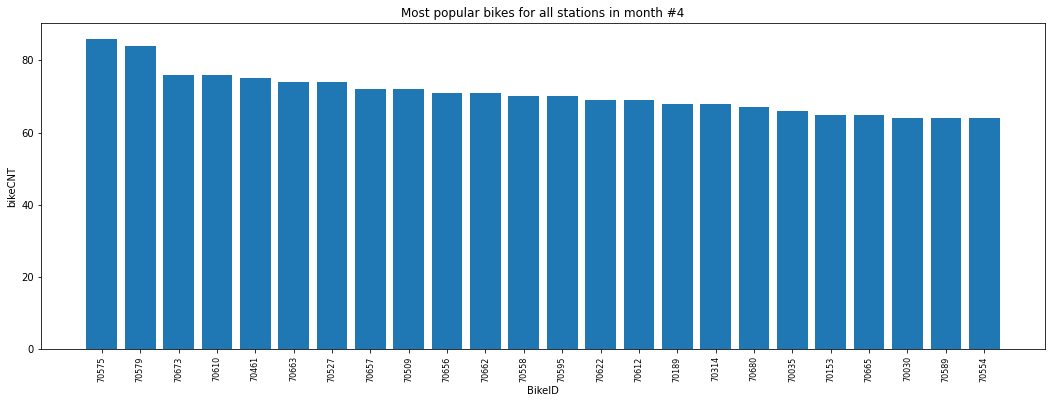

In [11]:
df_fct4 = df_all[['Starttime', 'From station id', "Bikeid"]].copy()
df_fct4['Starttime'] = df_fct4['Starttime'].dt.month
df_fct4 = df_fct4.groupby(['Starttime', 'Bikeid']).size().to_frame('bikeCNT').reset_index()
df_g4 = df_fct4.copy()

# Sort by most popular
df_g4.sort_values(by=['bikeCNT'], inplace=True, ascending=False)
df_g4 = df_g4.head(25)
fig = plt.figure(figsize=(18, 6))

plt.bar(df_g4['Bikeid'].astype(str), df_g4['bikeCNT'])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("BikeID")
plt.ylabel("bikeCNT")
plt.title("Most popular bikes for all stations in month #" + str(filter_month))

plt.show()

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

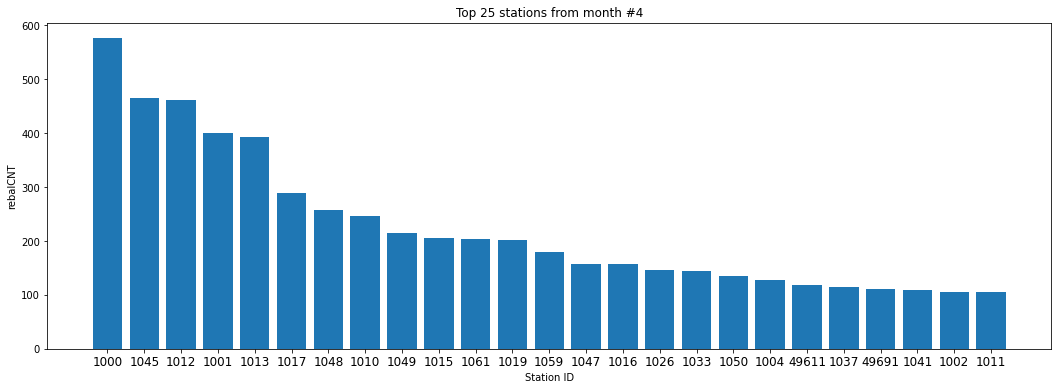

In [12]:
# sort dataframe by fromCNT
df_g5 = df_merge2.copy()
df_g5.sort_values(by=['rebalCNT'], inplace=True, ascending=False)

# removing dockless bikes
df_g5.drop(df_g5[df_g5['To station id'] == 0].index , inplace=True)

# filter by filter month
by_month =  df_g5.loc[df_g5['Starttime'] == filter_month]
by_month = by_month.head(25)

# # print(stat_ids)
by_month['To station id'] = by_month['To station id'].astype(str)
fig = plt.figure(figsize=(18, 6))

plt.bar(by_month['To station id'], by_month['rebalCNT'])
plt.xticks(fontsize=12)
plt.xlabel("Station ID")
plt.ylabel("rebalCNT")
plt.title("Top 25 stations from month #" + str(filter_month))

plt.show()

### Task 3.2

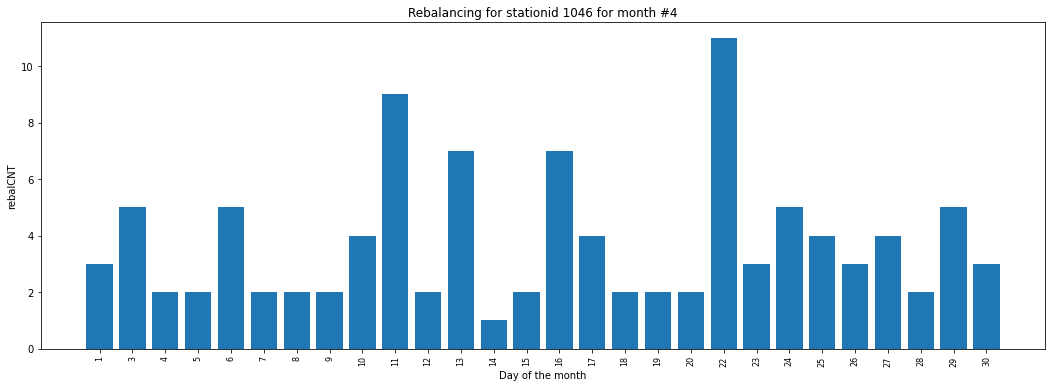

In [13]:
# sort dataframe by fromCNT
df_g6 = df_merge.copy()
# removing dockless bikes
df_g6.drop(df_g6[df_g6['To station id'] == 0].index , inplace=True)
# filter by filter month
df_g6['month'] = pd.DatetimeIndex(df_g6['Starttime']).month
by_month = df_g6.loc[df_g6['month'] == filter_month]

# filter by station id
by_id = by_month.copy()
by_id = by_id.loc[by_id['To station id'] == filter_stationID]

#sort by day
by_id.sort_values(by=['Starttime'], inplace=True, ascending=True)
by_id['day'] = pd.DatetimeIndex(by_id['Starttime']).day
by_id['day'] = by_id['day'].astype(str)


fig = plt.figure(figsize=(18, 6))

plt.bar(by_id['day'], by_id['rebalCNT'])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Day of the month")
plt.ylabel("rebalCNT")
plt.title("Rebalancing for stationid " + str(filter_stationID) + " for month #" + str(filter_month))

plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [14]:
# get counts group by month for each thing
# for rebalCNT
df_rclust = df_merge2.copy()
df_fclust = df_fct2.copy()

# for from month 7
by_monthf7 =  df_fclust[df_fclust['Starttime'] == 7]
by_monthf7 = by_monthf7.drop('Starttime', 1)
by_monthf7.rename(columns = {'From station id':'stationID'}, inplace = True)
by_monthf7.rename(columns = {'fromCNT':'fromCNT7'}, inplace = True)

# for from month 8
by_monthf8 =  df_fclust[df_fclust['Starttime'] == 7]
by_monthf8 = by_monthf8.drop('Starttime', 1)
by_monthf8.rename(columns = {'From station id':'stationID'}, inplace = True)
by_monthf8.rename(columns = {'fromCNT':'fromCNT8'}, inplace = True)

# for from month 9
by_monthf9 =  df_fclust[df_fclust['Starttime'] == 7]
by_monthf9 = by_monthf9.drop('Starttime', 1)
by_monthf9.rename(columns = {'From station id':'stationID'}, inplace = True)
by_monthf9.rename(columns = {'fromCNT':'fromCNT9'}, inplace = True)


# for rebal month 7
by_monthr7 =  df_rclust[df_rclust['Starttime'] == 7]
by_monthr7 = by_monthr7.drop('Starttime', 1)
by_monthr7.rename(columns = {'To station id':'stationID'}, inplace = True)
by_monthr7.rename(columns = {'rebalCNT':'rebalCNT7'}, inplace = True)

# for rebal month 8
by_monthr8 =  df_rclust[df_rclust['Starttime'] == 9]
by_monthr8 = by_monthr8.drop('Starttime', 1)
by_monthr8.rename(columns = {'To station id':'stationID'}, inplace = True)
by_monthr8.rename(columns = {'rebalCNT':'rebalCNT8'}, inplace = True)

# for rebal month 9
by_monthr9 =  df_rclust[df_rclust['Starttime'] == 9]
by_monthr9 = by_monthr9.drop('Starttime', 1)
by_monthr9.rename(columns = {'To station id':'stationID'}, inplace = True)
by_monthr9.rename(columns = {'rebalCNT':'rebalCNT9'}, inplace = True)


fdf1 = pd.merge(by_monthf7, by_monthf8, how='outer')
fdf2 = pd.merge(fdf1, by_monthf9, how='outer')
# print(fdf2.head())

rdf1 = pd.merge(by_monthr7, by_monthr8, how='outer')
rdf2 = pd.merge(rdf1, by_monthr9, how='outer')
# print(rdf2.head())

df_6all = pd.merge(fdf2, rdf2, how='outer')
df_6all = df_6all.fillna(0).astype(int)
df_6all['stationID'] = df_6all['stationID'].astype(str)


#====== KMEANS ======
print("====== Cluster ids for each station for KMeans ======")
x = df_6all.copy()
sse = {}
clustering_kmeans = sklearn.cluster.KMeans(n_clusters=1)
x['clusterk1'] = clustering_kmeans.fit_predict(df_6all)
sse['1'] = clustering_kmeans.inertia_
clustering_kmeans = sklearn.cluster.KMeans(n_clusters=2)
x['clusterk2'] = clustering_kmeans.fit_predict(df_6all)
sse['2'] = clustering_kmeans.inertia_
clustering_kmeans = sklearn.cluster.KMeans(n_clusters=3)
x['clusterk3'] = clustering_kmeans.fit_predict(df_6all)
sse['3'] = clustering_kmeans.inertia_
print(x)
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()


#====== DBSCAN ======
print("====== Cluster ids for each station for DBSCAN ======")
x2 = df_6all.copy()
db = sklearn.cluster.DBSCAN(eps=51, min_samples=3)
x2['cluster513'] = db.fit_predict(x2)
#print(x2['cluster513'].value_counts())
db = sklearn.cluster.DBSCAN(eps=101, min_samples=10)
x2['cluster10110'] = db.fit_predict(x2)
#print(x2['cluster10110'].value_counts())
db = sklearn.cluster.DBSCAN(eps=201, min_samples=3)
x2['cluster2013'] = db.fit_predict(x2)
#print(x2['cluster2013'].value_counts())
print(x2)

====== Cluster ids for each station for KMeans ======
    stationID  fromCNT7  fromCNT8  fromCNT9  rebalCNT7  rebalCNT8  rebalCNT9  \
0           0      1060      1060      1060       1742       1479       1479   
1         666         1         1         1          0          0          0   
2        1000       672       672       672        891        744        744   
3        1001       552       552       552        759        548        548   
4        1002       181       181       181        194        170        170   
..        ...       ...       ...       ...        ...        ...        ...   
114     49921       101       101       101        124        132        132   
115     49951        92        92        92        114        168        168   
116     90097         2         2         2          2          0          0   
117      4996         0         0         0          0          1          1   
118     49801         0         0         0          0        227 

### Task 4.2

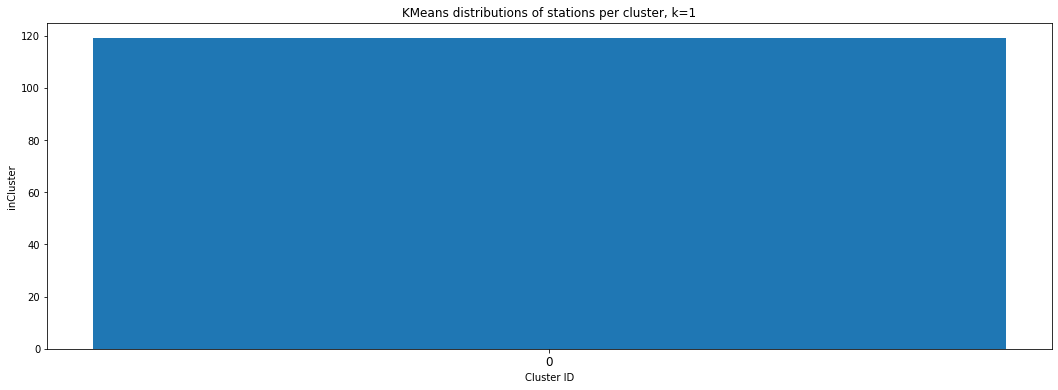

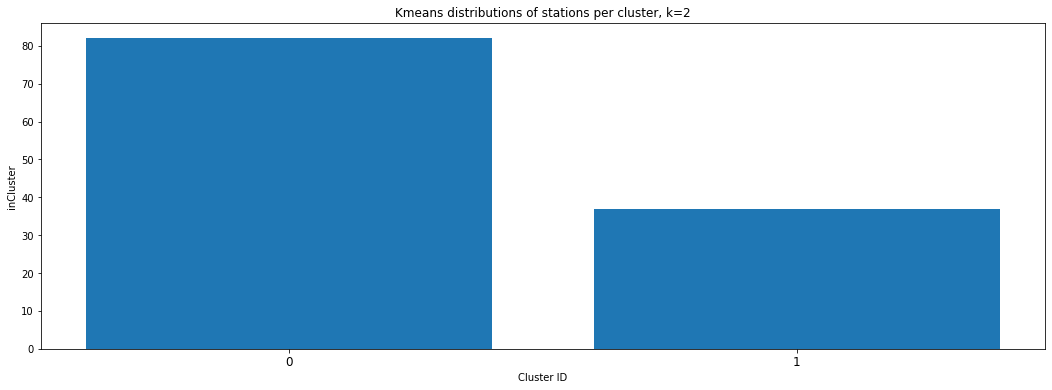

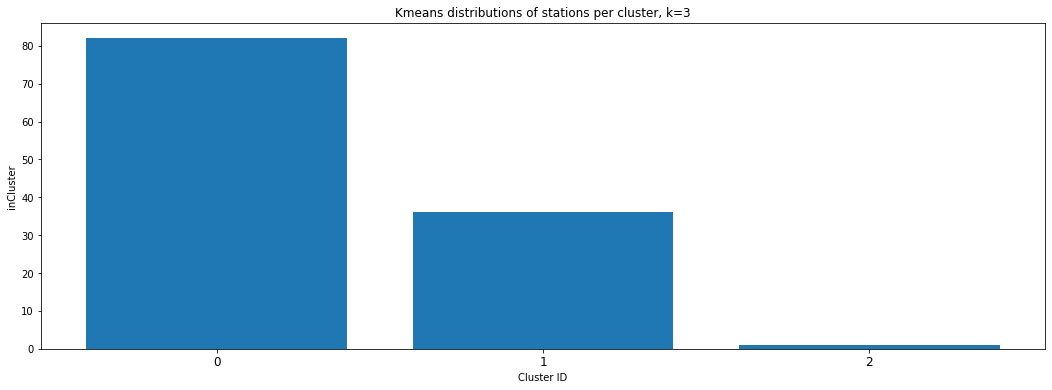

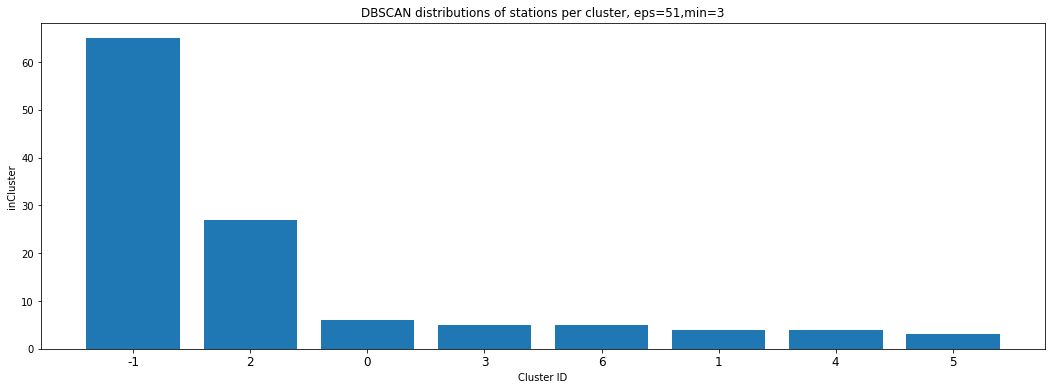

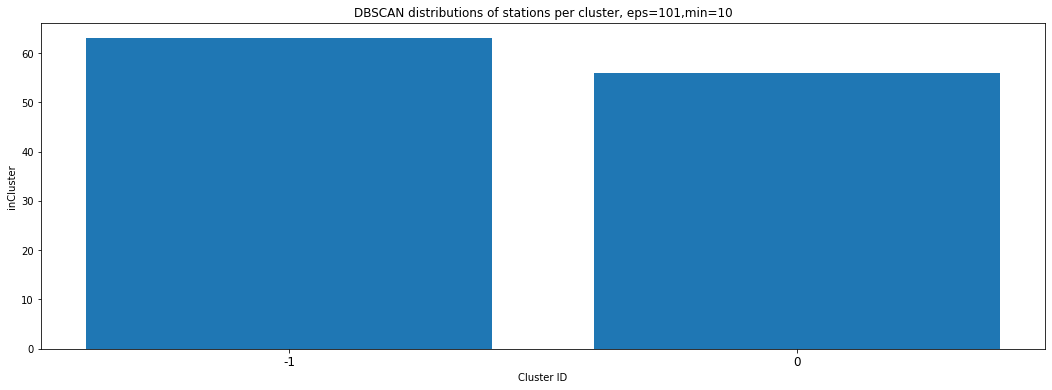

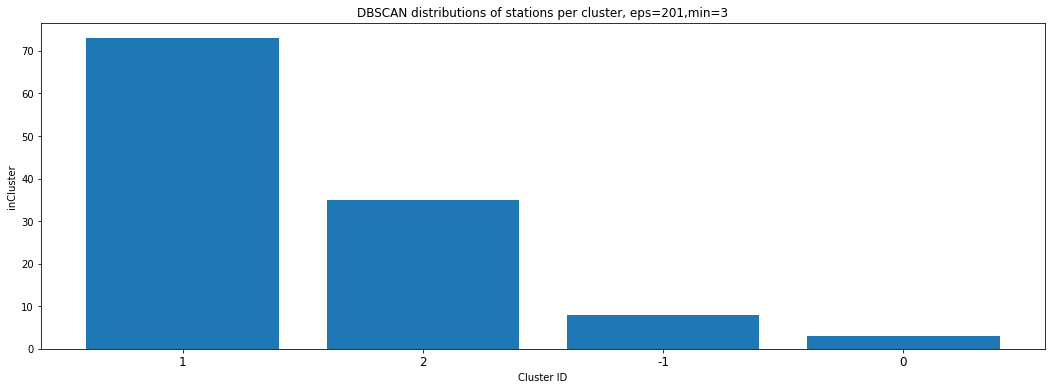

In [15]:
#====== BAR GRAPHS FOR KMEANS ======#
bar1 = x[['stationID', 'clusterk1']].copy()
bar1 = bar1.groupby(['clusterk1']).size().to_frame('inCluster').reset_index()
bar1['clusterk1'] = bar1['clusterk1'].astype(str)
bar1.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar1)

bar2 = x[['stationID', 'clusterk2']].copy()
bar2 = bar2.groupby(['clusterk2']).size().to_frame('inCluster').reset_index()
bar2['clusterk2'] = bar2['clusterk2'].astype(str)
bar2.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar2)

bar3 = x[['stationID', 'clusterk3']].copy()
bar3 = bar3.groupby(['clusterk3']).size().to_frame('inCluster').reset_index()
bar3['clusterk3'] = bar3['clusterk3'].astype(str)
bar3.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar3)

fig = plt.figure(figsize=(18, 6))
plt.bar(bar1['clusterk1'], bar1['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("KMeans distributions of stations per cluster, k=1")
plt.show()

fig = plt.figure(figsize=(18, 6))
plt.bar(bar2['clusterk2'], bar2['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("Kmeans distributions of stations per cluster, k=2")
plt.show()

fig = plt.figure(figsize=(18, 6))
plt.bar(bar3['clusterk3'], bar3['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("Kmeans distributions of stations per cluster, k=3")
plt.show()

#====== BAR GRAPHS FOR DBSCAN ======#
bar4 = x2[['stationID', 'cluster513']].copy()
bar4 = bar4.groupby(['cluster513']).size().to_frame('inCluster').reset_index()
bar4['cluster513'] = bar4['cluster513'].astype(str)
bar4.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar4)

bar5 = x2[['stationID', 'cluster10110']].copy()
bar5 = bar5.groupby(['cluster10110']).size().to_frame('inCluster').reset_index()
bar5['cluster10110'] = bar5['cluster10110'].astype(str)
bar5.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar5)

bar6 = x2[['stationID', 'cluster2013']].copy()
bar6 = bar6.groupby(['cluster2013']).size().to_frame('inCluster').reset_index()
bar6['cluster2013'] = bar6['cluster2013'].astype(str)
bar6.sort_values(by=['inCluster'], inplace=True, ascending=False)
#print(bar6)

fig = plt.figure(figsize=(18, 6))
plt.bar(bar4['cluster513'], bar4['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("DBSCAN distributions of stations per cluster, eps=51,min=3")
plt.show()

fig = plt.figure(figsize=(18, 6))
plt.bar(bar5['cluster10110'], bar5['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("DBSCAN distributions of stations per cluster, eps=101,min=10")
plt.show()

fig = plt.figure(figsize=(18, 6))
plt.bar(bar6['cluster2013'], bar6['inCluster'])
plt.xticks(fontsize=12)
plt.xlabel("Cluster ID")
plt.ylabel("inCluster")
plt.title("DBSCAN distributions of stations per cluster, eps=201,min=3")
plt.show()

### Task 4.3

In trying values for K in the KMeans algorithm, I started with a guess and check system. In order to test my own understanding of the algorithm, I first set k=1 to see that all stations were in one cluster.I then decided to try 2 and 3. I read in my research of the algorithm that the best value can be found using the Elbow method.I did this by plotting 1, 2, and 3 in a line graph and looking for the elbow bend. The bend completes at 3. (The code that generates this graph can be seen commented out in 4.1). Thus, 3 is the best value for k.

It seems to me like the DBSCAN algorithm has the potential to give more accurate predictions. There are, however,
more options for eps and min_samples that require a more nuanced knowledge of your data set. For that reason, I think that KMeans can be more effective when just starting out or with a new dataset to get quick impressions. However, DBSCAN could be more powerful in a more understood dataset. DBSCAN has the potential to give more accurate modelling depending upon the optimal selections for eps and min_sample.